## Titanic

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

### The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Setup 

* Imports libs and datasets(Train and Test).

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Matplotlib configuration
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
train = pd.read_csv("data/train.csv")

In [4]:
test = pd.read_csv("data/test.csv")

### Analisando o dataset  train

Nosso dataset de treino é o dataset que vamos utilizar para treinar o nosso modelo de Machine Learning.

Vamos veriicar quais variáveis possuímos disponível.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Nosso DataSet possui 12 colunas:
* PassagerId: Id de cada passageiro.
* Survived: Sobreviventes do naufrágio.
* Pclass: Número da classe (1,2,3)
* Name: nome do passageiro.
* Sex: Sexo do passageiro (male or female)
* Age: Idade dos passageiros.
* SibSb: Número de irmãos/companheiros a bordo do Titanic
* Parch: Número de pais/filhos a bordo do Titanic
* Ticket: Número do ticket
* Cabin: Número da Cabine
* Embarked: Local de Embarque

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vamos verificar se nosso dataset de treino possuem valores nulos.

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Analisando o Dataset de Teste 

Vamos verificar o nosso dataset de teste, que é onde aplicaremos nosso modelo de Machine Learning.


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Em nossa base de test também possuímos um total de 11 colunas com 418 linhas. Entre essas 11 variáveis 5 são variáveis categóricas e 6 variáveis numéricas int ou float.

Vamos verificar nosso dataset de test.

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Vamos verificar se há valores nulos em nossa base de teste.

In [9]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

A nossa base de teste possuí valores missing nas variáveis *Cabin* e *Age*. 

### Analisando o nosso dataset

Vamos analisar nossos dataset: 

* Verificar se há variáveis que não vamos utilizar na análise.
* Remover ou substituir os valores em branco.

**Removendo variáveis**


Observando as variáveis podemos perceber que algumas variáveis não influenciam na nossa previsão. Sendo elas o Ticket e a Cabin. Então podemos retirá-las da análise (para o dataset de train e test).

In [10]:
train = train.drop(['Ticket','Cabin'], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [11]:
test = test.drop(['Ticket','Cabin'], axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


**Tratando valores em branco**

O nossa dataset de train possui 177 elementos com idade em branco. Logo devemos pensar em uma forma de preencher esses valores para que não alterem a performance do modelo.

Vamos verificar as distribuições das idades de nosso dataset:

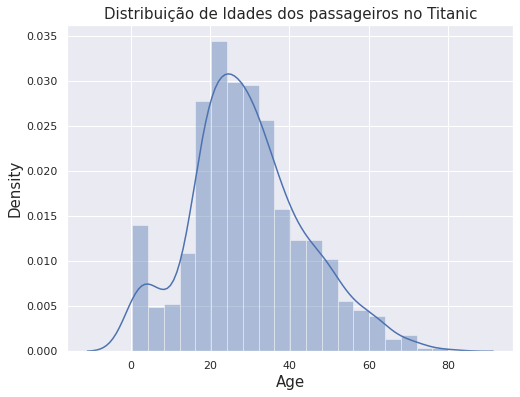

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(train["Age"], kde=True, ax = ax)
plt.title('Distribuição de Idades dos passageiros no Titanic', fontsize= 15)
plt.ylabel("Density", fontsize= 15)
plt.xlabel("Age", fontsize= 15)
plt.show();

Possuímos entre o nosso dataset de treino 25 valores únicos de idades. Conforme podemos observar no gráfico de distribuição a maioria das idades se concentram entre 20 e 40 anos.

In [13]:
train['Age'].value_counts().nunique()

25

As idades informadas pelos passageiros tem uma média de aproximadamente 29 anos com um desvio padrão de 14.52, nos confirmando a ampla distribuição de idades. 

In [14]:
train['Age'].mean()

29.69911764705882

In [15]:
train['Age'].std()

14.526497332334044

A mediana de distribuição das idades dos passageiros é 28 anos.

In [16]:
median= train['Age'].median()
median

28.0

Ao substituir os valores ausentes pela média das idades vamos interferir na nossa amostra, ignorando plenamente os sujeitos e aumentando o poder da amostra o que poderá nos guiar para conclusões indevidas. Desta forma, creio que a mediana seja o valor mais adequado para substituir os dados nulos.

In [17]:
train['Age'].fillna(value=median, inplace=True)
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [18]:
test['Age'].fillna(value=28.0, inplace=True)
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

Além das variáveis de idade nulas também possuímos valores nulos para os datasets:

* Train: Embarked possuí 2 valores nulos.
* Test: Fare possuí 1 valor nulo.

Para o dataset de test é simples: vamos substituir os valores nulos pela mediana.

In [19]:
median = test['Fare'].median()

In [20]:
test['Fare'].fillna(value=median, inplace=True)
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Para o dataset de train a variável Embarked é uma variável categórica, logo devemos transformá-las em variáveis numéricas antes de substituir os valores vazios.

### Transformando variáveis categóricas em variáveis numéricas

Em nosso dataset de treino possuímos 2 variáveis categóricas que devemos transformar em variáveis numéricas, sendo elas:

* Sex
* Embarked

**Variável Sex**

Vamos substituir male por 0 e female por 1 em ambos os datasets.

In [21]:
sex = {'male': 0, 'female': 1}
train['Sex'] = train['Sex'].map(sex)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [22]:
sex = {'male': 0, 'female': 1}
test['Sex'] = test['Sex'].map(sex)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,28.0,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",0,28.0,0,0,8.0500,S


**Variável Embarked**

Vamos substituir os pontos de embarques por valores numéricos. Posuímos 3 portos de embarque únicos, logo os substituiremos da seguinte forma:

* C == 0
* S == 1
* Q == 2

In [23]:
train['Embarked'].value_counts().nunique()

3

In [24]:
embarked = {'C' :0, 'S' : 1, 'Q' :2}
train['Embarked'] = train['Embarked'].map(embarked)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1.0


In [25]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

Vamos substituir os valores nulos do Embarked pelo ponto que mais aparece em nossa amostra, ou seja pela moda.

In [26]:
train['Embarked'].mode()

0    1.0
dtype: float64

In [27]:
train['Embarked'].fillna(value=1.0, inplace=True)
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [28]:
test['Embarked'] = test['Embarked'].map(embarked)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,1


Desejamos prever o número de sobreviventes em nosso dataset de teste através dos dados de nosso dataset de treino. Apesar de possuírmos muitas variáveis numéricas podemos de formas gráficas relacionál-las com as nossas variáveis categóricas, então vamos a algumas provocações:

* Pensando no Titanic quantos sobreviventes eram do sexo masculino e quantos do sexo feminino?
* Possuímos 3 classes, qual classe possui maior número de sobreviventes?
* Pensando na Idade, em qual faixa etária se encontram nossos sobreviventes?

**Sobreviventes em relação ao sexo**


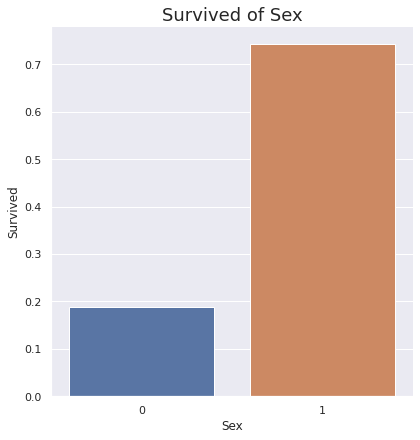

In [29]:
g = sns.catplot(x="Sex", y="Survived", data=train,
                height=6, kind="bar", ci=None)
g.ax.set_title("Survived of Sex",fontdict= {'size':18})
plt.show()

Possuímos mais sobreviventes mulheres que homens em nosso dataset. O que faz sentido se pensarmos no filme: nos botes salva-vidas embarcavam primeiro as mulheres e crianças. Logo há probabilidade de sobrevivência é maior se você for do sexo feminino.

**Sobreviventes de acordo com a classe**

No Titanic temos 3 classes: 

* Classe 1: Classe alta (composta pela aritocrácia).
* Classe 2: Classe média (burguesia trabalhadora).
* Classe 3: Composta pelo proletariado.

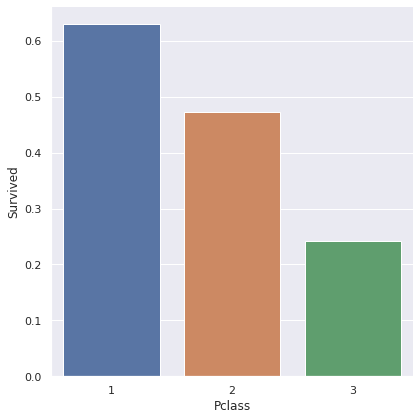

In [30]:
g = sns.catplot(x="Pclass", y="Survived", data=train,
                height=6, kind="bar", ci=None)
plt.show()

No Titanic além de embarcarem nos botes salva vidas primeiro as mulheres e crianças, o embarque foi feito por classes: classe 1, classe 2 e classe 3. Logo, como os passageiros da classe 3 embarcarem nos botes por último a probabilidade de sobrevivẽncia dessa classe é menor.

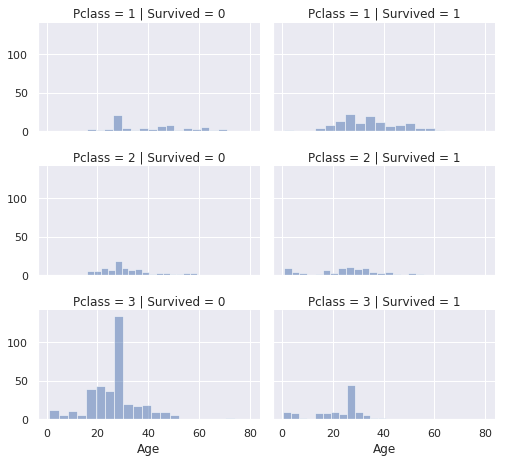

In [31]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Estatística Descritiva**

Vamos verificar através do *describe()* os valores de média, desvio padrão, limites e quartis. 

Olhando para a variável **Survived** percebemos que do total de passageiros, apenas 40% sobreviveram em nosso dataset.

In [32]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.897868
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.514624
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Vamos verificar em nosso dataset de sobreviventes quais desses sobreviventes são Homens ou mulheres e qual a faixa etária desses sobreviventes. 


Por nossas análises sabemos que a maioria dos sobreviventes é do sexo feminino, entretanto, qual a faixa etária desses sobreviventes? É necessário ressaltar que a variável **Sex** é a que define o sexo do indivíduo é uma variável categórica.

Text(0.5, 1.0, 'Male')

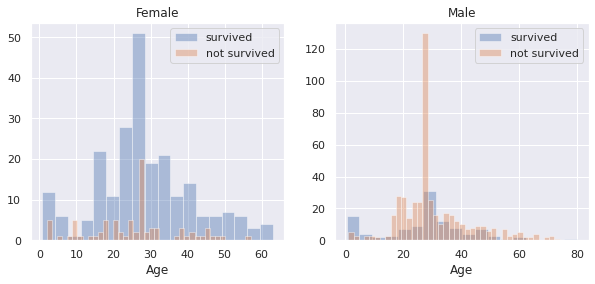

In [33]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

female = train[train['Sex']==1]
male = train[train['Sex']==0]

ax = sns.distplot(female[female['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(female[female['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')


ax = sns.distplot(male[male['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

Observando nossos plots podemos fazer as seguintes inferências:

* O sexo feminino concentra o maior número de sobreviventes, principalmente na faixa de 15 a 40 anos.
* A maioria de sobreviventes do sexo masculino estão entre 0 e 10 anos, o que reforça a definição de crianças embarcando nos botes salva vidas suas mães, provavelmente.


/home/valeria.silva/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/valeria.silva/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/valeria.silva/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


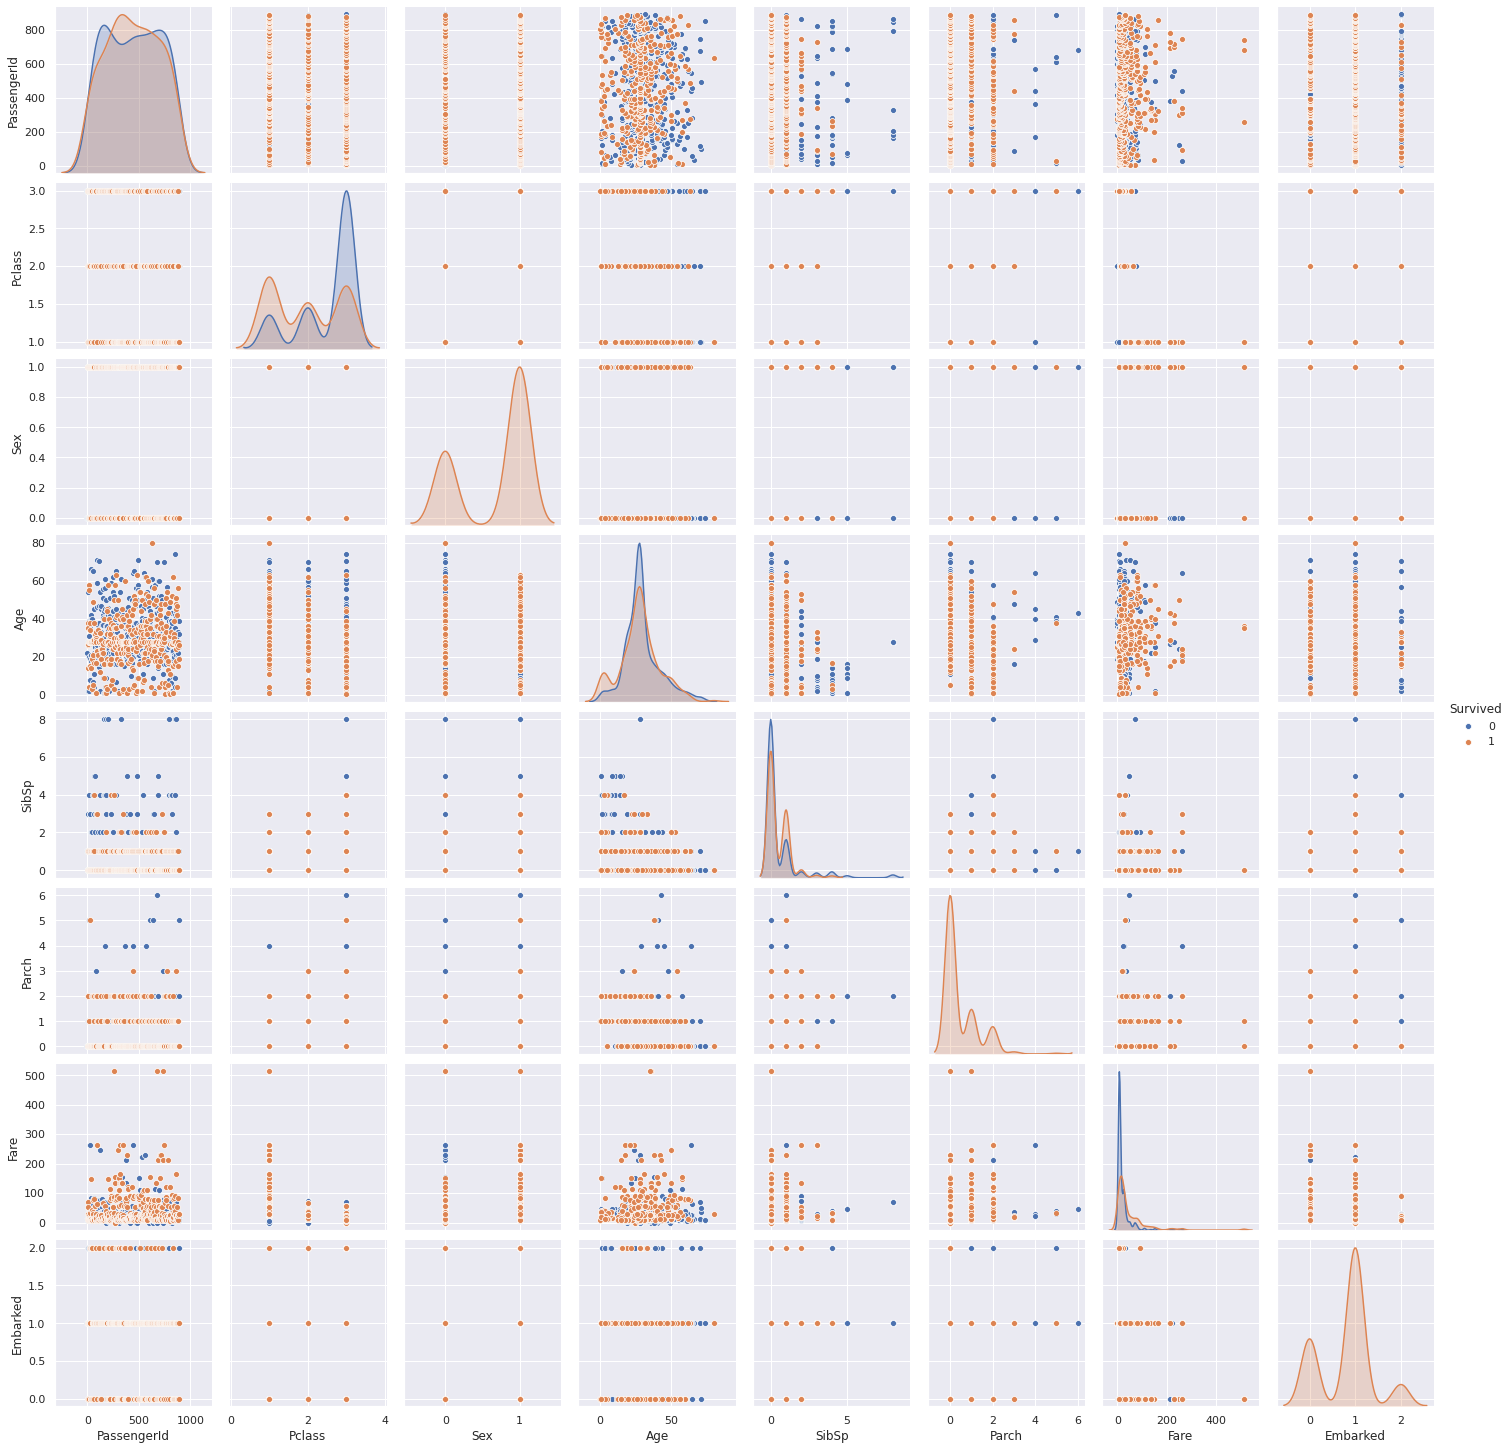

In [34]:
sns.pairplot(data=train, hue="Survived")

### Aplicando a Regressão Linear

Vamos verificar nossos dataset e remover a variável Name em ambos os datasets.

In [38]:
train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1.0
1,2,1,1,1,38.0,1,0,71.2833,0.0
2,3,1,3,1,26.0,0,0,7.9250,1.0
3,4,1,1,1,35.0,1,0,53.1000,1.0
4,5,0,3,0,35.0,0,0,8.0500,1.0


In [41]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,1
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,1


In [49]:
X_train = train.drop('Survived', axis=1)
Y_train = train['Survived']
X_test  = test.copy()

In [50]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,0,28.0,0,0,8.0500,1
414,1,1,39.0,0,0,108.9000,0
415,3,0,38.5,0,0,7.2500,1
416,3,0,28.0,0,0,8.0500,1


In [51]:
Y_prediction = random_forest.predict(X_test)

In [55]:
Y_prediction =  pd.Series(Y_prediction)
Y_prediction

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Length: 418, dtype: int64

In [59]:
test_Id= X_test['PassengerId']

In [60]:
answer = pd.concat([test_Id, Y_prediction], axis=1)
answer

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [61]:
answer.rename(columns={0:'Survived'}, inplace=True)
answer

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
answer.to_csv('answer.csv',columns=['PassengerId', 'Survived'], sep=',', index=False)